<h1 style="background-color:rgb(67, 77, 86);
           font-size:300%;
           font-style: oblique;
           color:white;
           text-align:center;
           margin: auto;
           padding: 20px;">Predicting Bank Churners</h1>

<h2 style="background-color:rgb(141, 153, 165);
           font-size:250%;
           color:white;
           text-align:center;
           margin: auto;
           padding: 10px;">Chapter 2: Explanatory Data Analysis - Pt 2</h2>

<a id='1.1'>
    <h2 style='font-size:180%;'>
        Mission</h2></a>

<figure>
    <blockquote cite='https://www.kaggle.com/sakshigoyal7/credit-card-customers/tasks?taskId=2729'>
        <p style='font-size:110%;
                  color:hsl(208, 12%, 30%);'><i>Our top priority in this business problem is to identify customers who are getting churned. Even if we predict non-churning customers as churned, it won't harm our business. But predicting churning customers as non-churning will do. So recall needs to be higher. Till now, I have managed to get a recall of 62%.</i></p>
    </blockquote>
    <figcaption>—Sakshi Goyal, <cite>Credit Card Customers, Kaggle</cite></figcaption>

*Note: Chapter 2 is broken into two parts. Pt 2 picks up from Distribution by Churn $\Rightarrow$ Categorical Features.*

<h2 style='font-size:180%;'>
    Table of Contents
</h2>

* [Exploratory Data Analysis](#3)
    * [Libraries](#3.1)
    * [Data Loading](#3.2)
    * [Data Visualization](#3.3)
      * [Histograms](#3.3.1)
      * [Box Plots](#3.3.2)
      * [Scatter Plots](#3.3.3)
      * [Distribution by Churn](#3.3.4)
        * [Numerical Features](#3.3.4.1)
        * [Categorical & Discrete Numerical Features](#3.3.4.2)
        * [Variance to Baseline](#3.3.4.3)

<a id='3'>
    <h2 style='background-color:rgb(141, 153, 165);
               font-size:240%;
               color:white;
               text-align:center;
               margin: auto;
               padding: 10px;'>
        Explanatory Data Analysis
    </h2>
</a>

<a id='3.1'>
    <h2 style='font-size:180%;'>
        Libraries</h2></a>

In [1]:
# general
import pandas as pd
import numpy as np
import random as rd
import copy

# data visualization
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import chart_studio.plotly
from pandas.plotting import scatter_matrix

# settings
%matplotlib inline
pd.options.display.float_format = "{:,.2f}".format

# saving
import os
# for dirname, _, filenames in os.walk("source"):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

<a id='3.2'>
    <h2 style='font-size:180%;'>
        Data Loading</h2></a>

In [2]:
# load data
d = pd.read_csv('source/d_orig.csv')
d_num = pd.read_csv('source/d_num.csv')

In [21]:
# make a variable for visualization of interest
d['tx_amt_pertx_r12'] = d['tx_amt_r12']/d['tx_ct_r12']

<a id='3.4.4.2'>
    <h2 style='font-size:150%;'>
        Categorical & Discrete Numerical Features</h2></a>

In [24]:
def plot_distr_cat(var_cat, var_cat_display_name):
    
    palette_orig = px.colors.sequential.deep[::-1]
    palette_new = [palette_orig[0],palette_orig[2],palette_orig[4],
                   palette_orig[5],palette_orig[6],palette_orig[8],palette_orig[9]]
    
    d_bar = d.groupby('churn')[var_cat].value_counts().reset_index(name='ct')
    churn_ct_tot = d_bar.groupby('churn')['ct'].transform('sum')
    d_bar['%'] = d_bar['ct']/churn_ct_tot*100
    d_bar['churn'] = d_bar['churn'].map({'Existing Customer': 'Existing',
                                         'Attrited Customer': 'Attrited'})
    churn1 = d_bar[d_bar['churn']=='Attrited']
    churn0 = d_bar[d_bar['churn']=='Existing']
    
    tr0 = go.Bar(x=churn0['%'],
                 y=churn0['churn'],
                 name='Existing',
                 showlegend=False,
                 orientation='h',
                 hovertext=churn0['ct'],
                 text=churn0[var_cat],
                 texttemplate = "%{text} %{x:.0f}% <br>(%{hovertext:,d})",
                 textfont=dict(size=12, color='white'),
                 textposition = "inside",
                 marker=dict(color=palette_new, line=dict(color='rgb(248, 248, 249)', width=0.5)))
    tr1 = go.Bar(x=churn1['%'],
                 y=churn1['churn'],
                 name='Attrited',
                 showlegend=False,
                 orientation='h',
                 hovertext=churn1['ct'],
                 text=churn1[var_cat],
                 texttemplate = "%{text} %{x:.0f}% <br>(%{hovertext:,d})",
                 textfont=dict(size=12, color='white'),
                 textposition = "inside",
                 marker=dict(color=palette_new, line=dict(color='rgb(248, 248, 249)', width=0.5)))

    data = [tr0, tr1]
    layout = go.Layout(barmode = 'stack',
                       title=f'<b>Distribution of {var_cat_display_name} by Churn Status<b>',
                       xaxis=dict(title=f'{var_cat_display_name} (%)',
                                  titlefont_size=16,
#                                   categoryorder='array',
#                                   categoryarray=var_cat_display_order,
                                  tickmode='array',
                                  ticktext=['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'],
                                  tickfont_size=14,
                                  tickangle=0),
                       yaxis=dict(title='Customer Type',
                                  titlefont_size=16,
                                  tickfont_size=14,
                                  tickangle=-90),
                       margin=dict(l=120, r=10, t=140, b=80),
                       bargap=0.2,
                       bargroupgap=0.1,
                       width=1000,
                       height=500)
    
    fig = go.Figure(data=data, layout=layout)
    
    fig.show()

The plots below show various distributions in categorical and discrete numerical features between churned and existing customers.

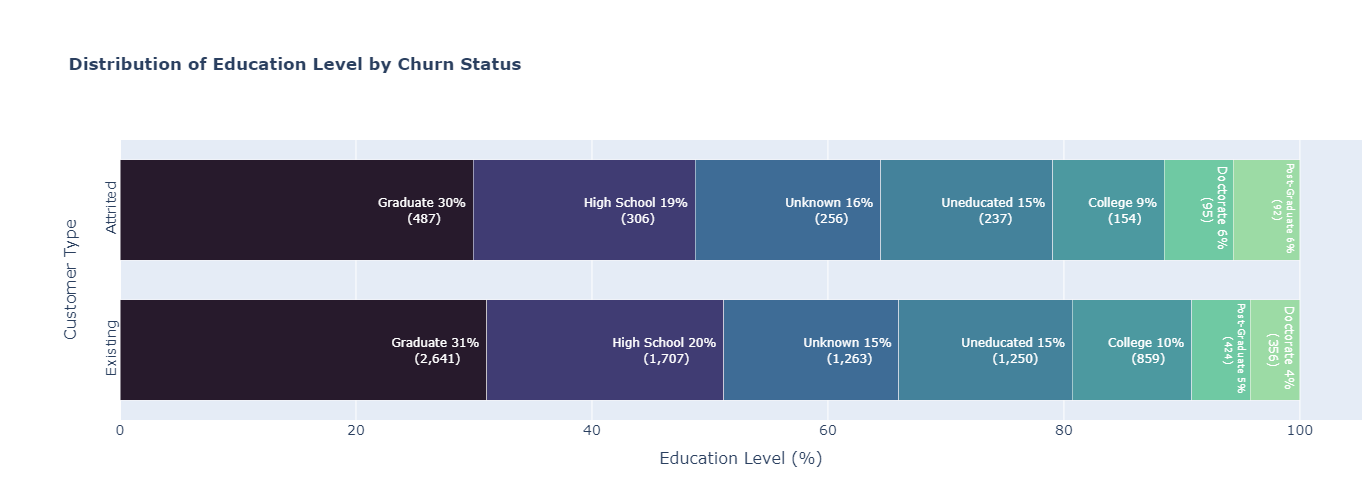

In [25]:
plot_distr_cat('educ_cat', 'Education Level')

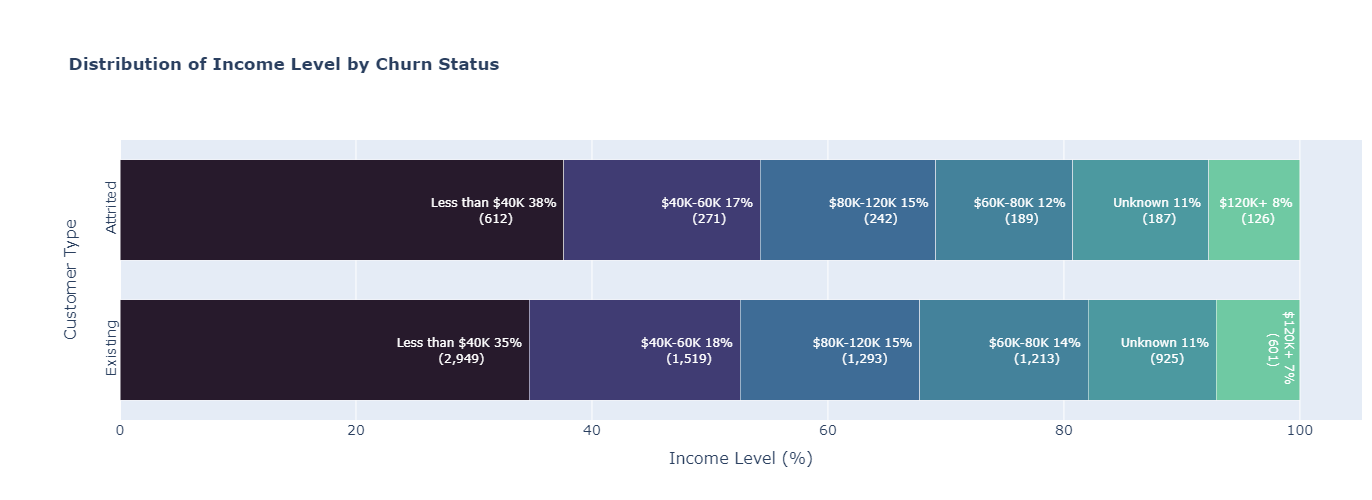

In [26]:
plot_distr_cat('inc_cat', 'Income Level')

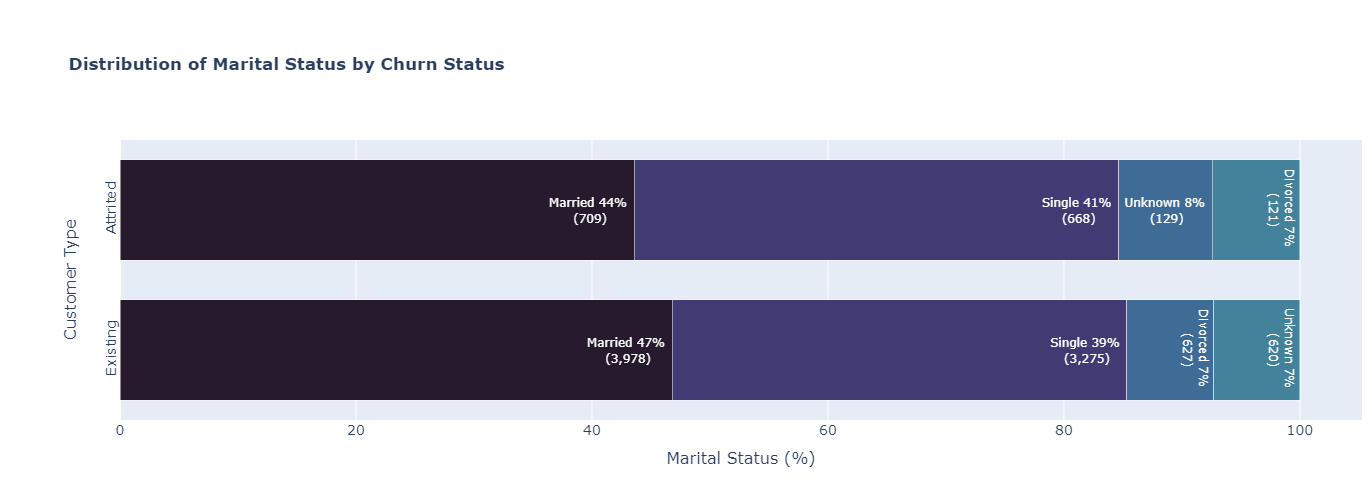

In [27]:
plot_distr_cat('marstat', 'Marital Status')

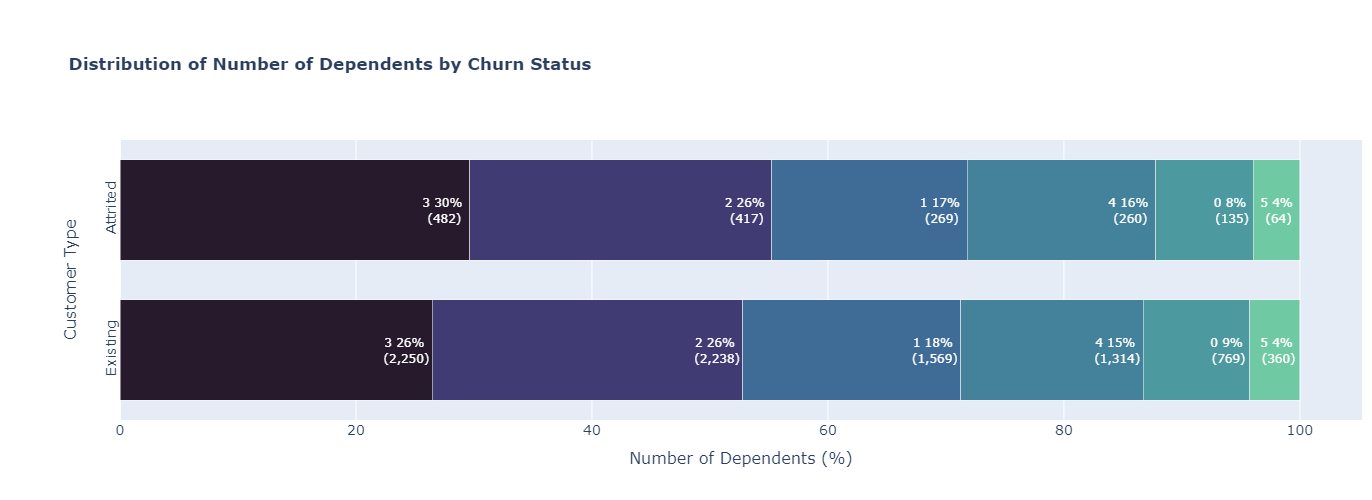

In [28]:
plot_distr_cat('dependents', 'Number of Dependents')

We see some more variability between the two customer groups in the number of inactive months. Existing customers tend to log in much more frequently compared to attrited customers.

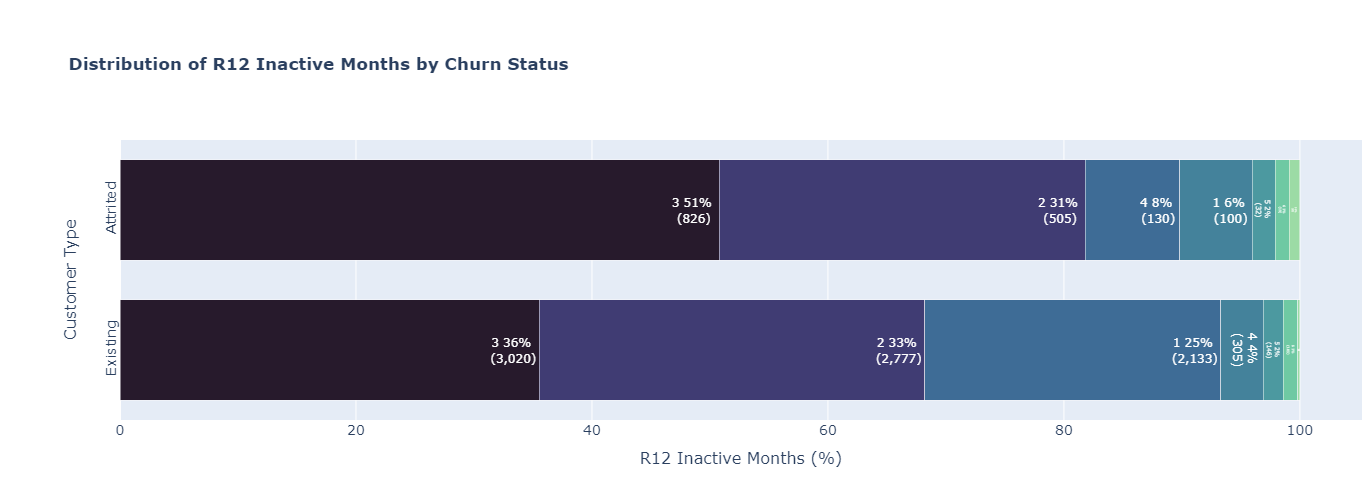

In [29]:
plot_distr_cat('mo_inactive_r12', 'R12 Inactive Months')

Attrited customers generally hold fewer products than existing customers.

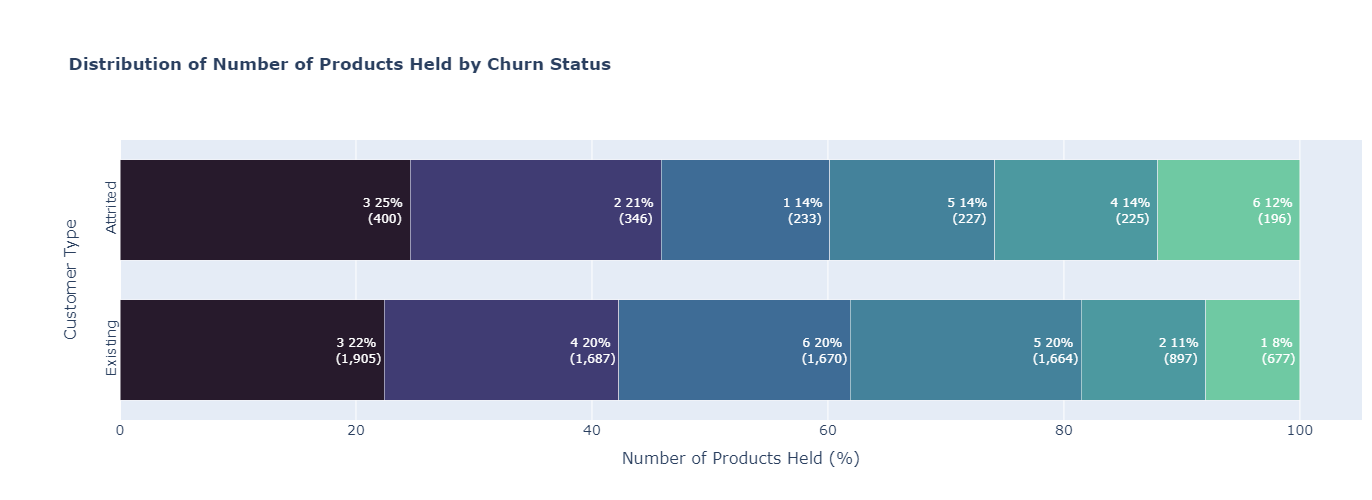

In [30]:
plot_distr_cat('prod_ct', 'Number of Products Held')

<a id='3.4.4.3'>
    <h2 style='font-size:150%;'>
        Variance to Baseline</h2></a>

In [31]:
def plot_var_to_baseline(var_cat, var_cat_display_name, var_cat_display_order):
    
    d_bar = d.groupby(var_cat)['churn'].value_counts().unstack(level=-1).reset_index().rename(
        columns={'Attrited Customer':'attrited', 
                 'Existing Customer':'existing'})
    d_bar['total'] = d_bar['attrited']+d_bar['existing']

    d_bar['%_attrited_class'] = d_bar['attrited']/sum(d_bar['attrited'])
    d_bar['%_existing_class'] = d_bar['existing']/sum(d_bar['existing'])
    d_bar['attrited_vs_existing'] = d_bar['%_attrited_class'] - d_bar['%_existing_class']

    tr = go.Bar(x=d_bar[var_cat],
                y=d_bar['attrited_vs_existing'],
                name='Attrited vs. Existing Customers',
                marker_color='rgba(64, 60, 115, 0.7)')

    data = [tr]
    
    layout = go.Layout(barmode = "stack",
                       title=f'Variance to Baseline of Attrited Customers by {var_cat_display_name}',
                       xaxis=dict(title=var_cat_display_name,
                                 titlefont_size=14,
                                 tickfont_size=12,
                                 tickangle=30,
                                 categoryorder='array',
                                 categoryarray=var_cat_display_order),
                       yaxis=dict(title='Variance to Baseline',
                                 titlefont_size=14,
                                 tickfont_size=12,
                                tickformat="%"),
                       bargap=0.2,
                       bargroupgap=0.1,
                       width=600,
                       height=400)
    fig = go.Figure(data=data, layout=layout)
    fig.show()

Although the percentage difference is minimal, interestingly attrited customers tend to hold more higher education (post-graduate and doctorate degrees) compared to existing customers.

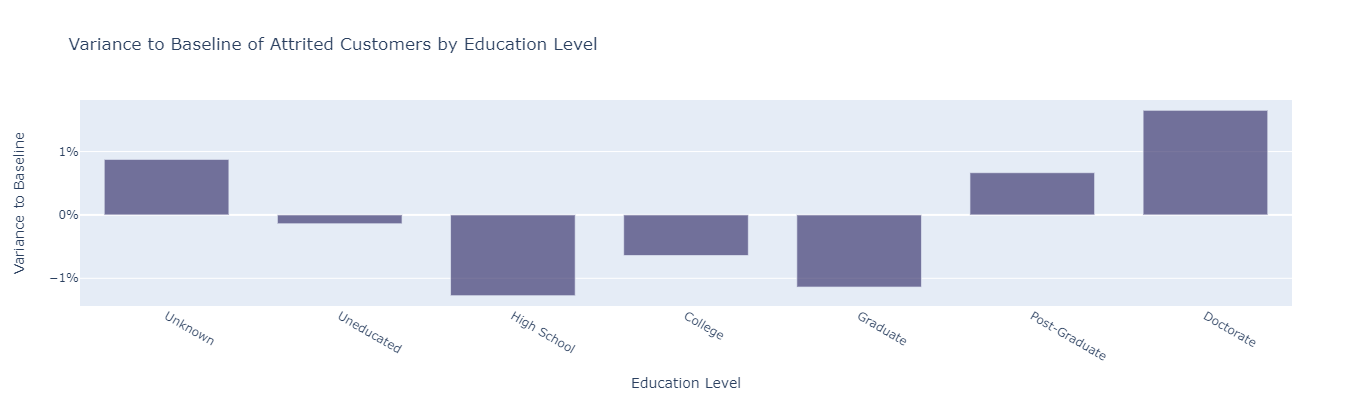

In [32]:
order_cat = ['Unknown', 'Uneducated', 'High School', 
              'College', 'Graduate', 'Post-Graduate', 'Doctorate']
plot_var_to_baseline('educ_cat', 'Education Level', order_cat)

Attrited customers tend to have lower income (less than 40k) compared to existing customers. They are much less likely to be in the 60k-80k bracket. Again, the percentage difference is minimal.

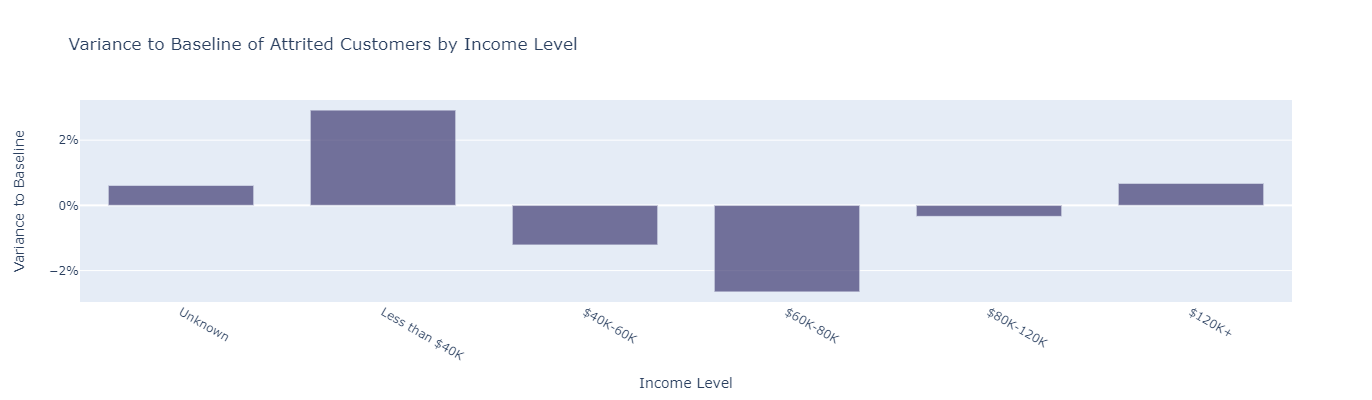

In [33]:
order_cat = ['Unknown', 'Less than $40K', '$40K-60K', 
              '$60K-80K', '$80K-120K', '$120K+']
plot_var_to_baseline('inc_cat', 'Income Level', order_cat)

Attrited customers are more likely to be single and less likely to be married.

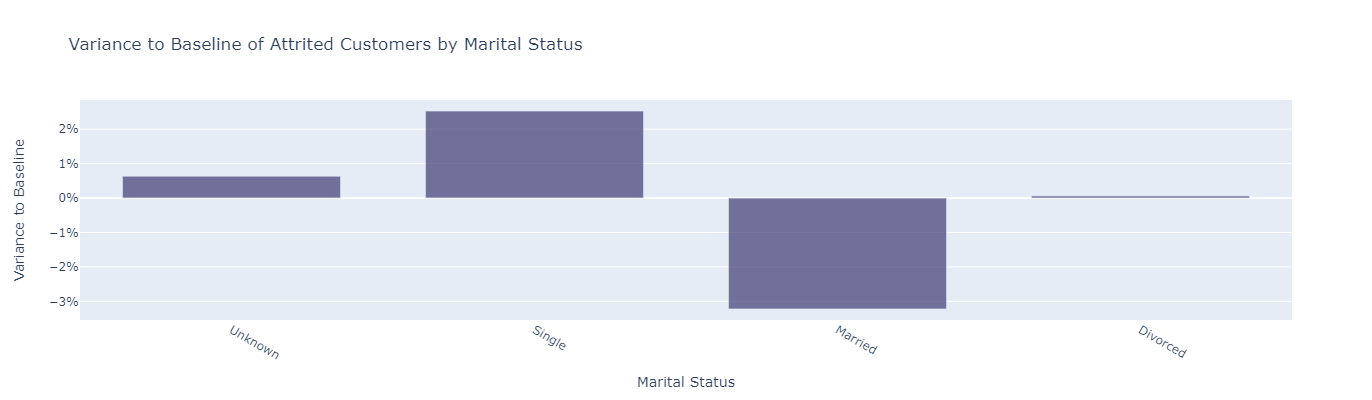

In [34]:
order_cat = ['Unknown', 'Single', 'Married', 'Divorced']
plot_var_to_baseline('marstat', 'Marital Status', order_cat)

Attrited customers are much more likely to be inactive for 3 months (15% higher than the existing customers) and less likely to be inactive for only 1 month (19% lower than the existing customers).

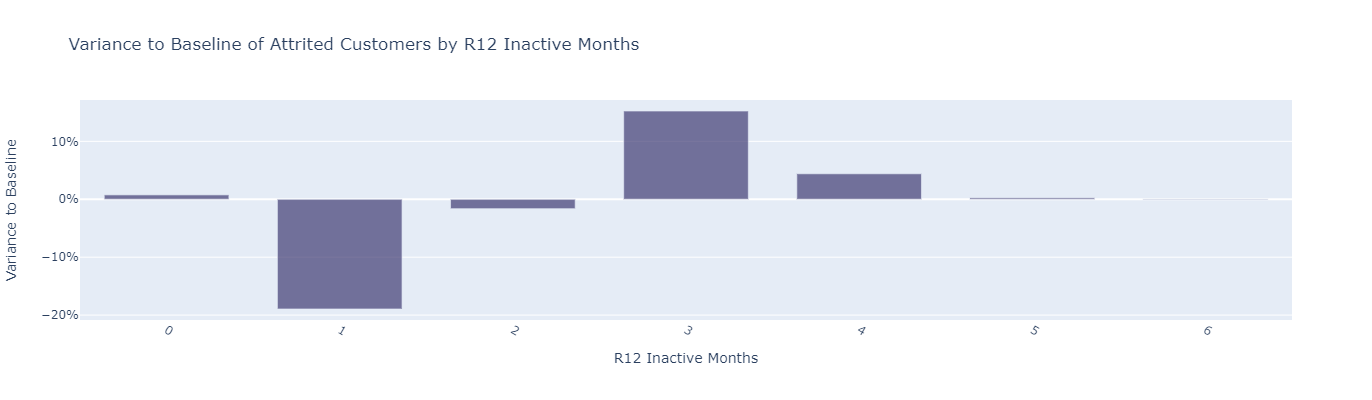

In [36]:
order_cat = [i for i in range(7)]
plot_var_to_baseline('mo_inactive_r12', 'R12 Inactive Months', order_cat)

Attrited customers are much more likely to hold fewer number of products (2 or fewer) compared to existing customers (4 or more).

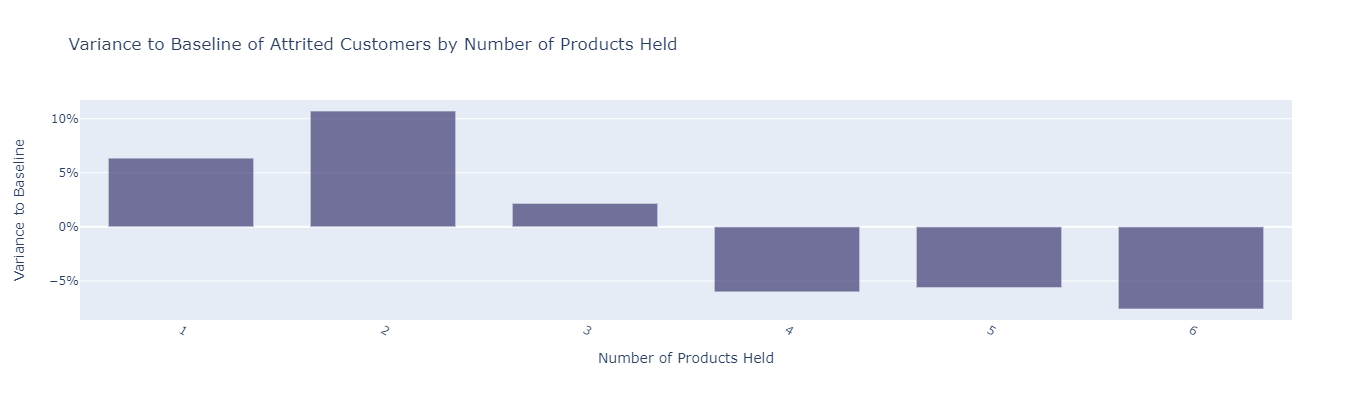

In [37]:
order_cat = [1, 2, 3, 4, 5, 6]
plot_var_to_baseline('prod_ct', 'Number of Products Held', order_cat)